In [31]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riwaj111111","key":"e2710ed6add44b6796cb0bf1697f3139"}'}

In [32]:
!pip install -q kaggle

In [33]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [34]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

mkdir: cannot create directory ‘traffic_sign_dataset’: File exists
/content/traffic_sign_dataset/traffic_sign_dataset


In [35]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         120075       1159  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          15497        295  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1406         32  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [36]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 611M/612M [00:10<00:00, 69.6MB/s]
100% 612M/612M [00:10<00:00, 59.0MB/s]


In [37]:
!unzip /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip

!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00024.png  
  inflating: traffic_sign

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from tqdm import tqdm
import keras

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np



from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from PIL import Image
from tensorflow.keras.utils import to_categorical

from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input

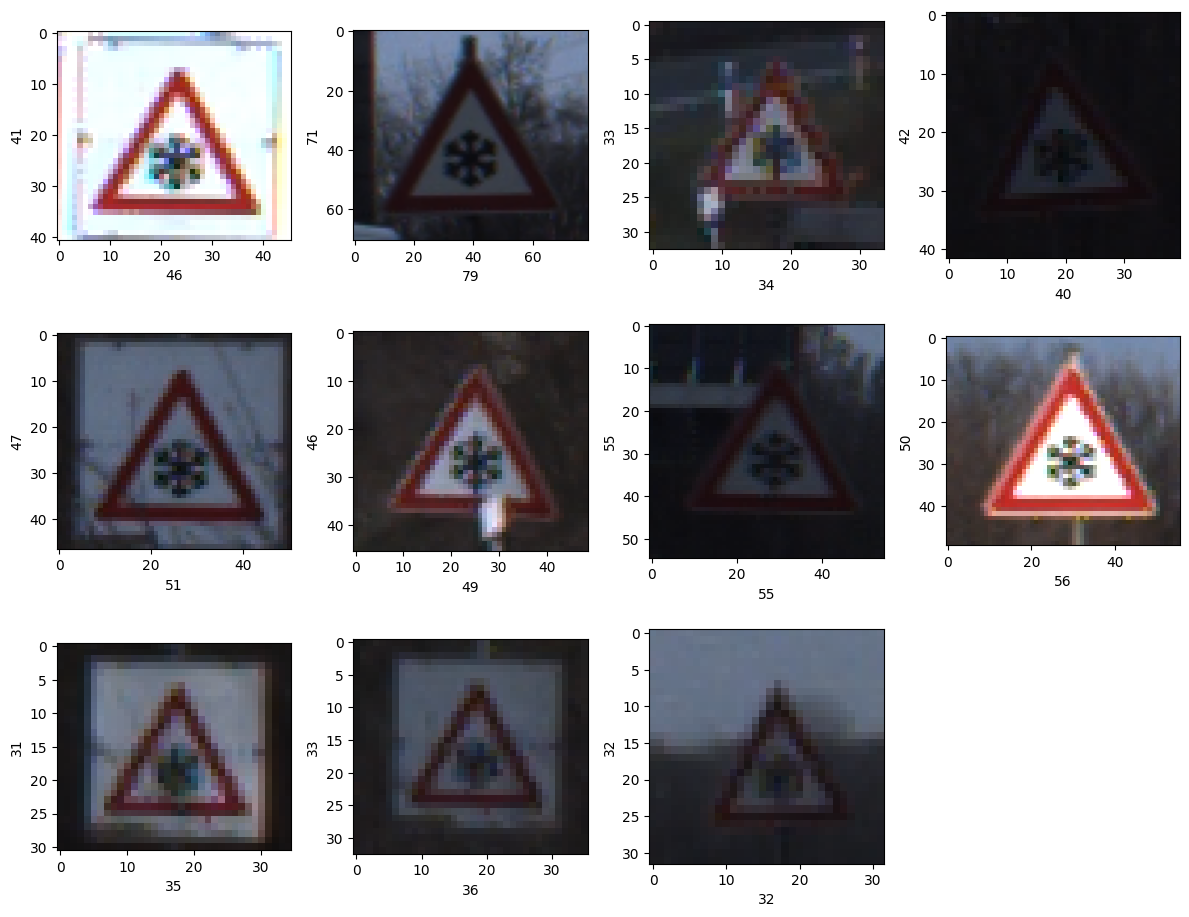

In [39]:
# Plotting 12 images to check the dataset

plt.figure(figsize=(12,12))
path = '/content/traffic_sign_dataset/traffic_sign_dataset/Train/30'

for i in range(1,12):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [40]:
dim1 = []
dim2 = []

for i in range(0, 43):

  labels = '/content/traffic_sign_dataset/traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])


In [41]:
dim1, dim2

([39,
  75,
  48,
  30,
  39,
  65,
  42,
  47,
  33,
  95,
  54,
  44,
  100,
  36,
  55,
  93,
  69,
  36,
  44,
  61,
  41,
  28,
  42,
  35,
  28,
  54,
  45,
  39,
  37,
  31,
  39,
  69,
  88,
  32,
  61,
  47,
  93,
  59,
  110,
  34,
  41,
  37,
  69,
  62,
  39,
  33,
  38,
  51,
  33,
  104,
  33,
  32,
  47,
  73,
  45,
  27,
  30,
  34,
  35,
  38,
  84,
  49,
  56,
  49,
  44,
  48,
  30,
  73,
  110,
  88,
  37,
  34,
  50,
  97,
  38,
  54,
  31,
  85,
  45,
  89,
  36,
  62,
  63,
  36,
  95,
  124,
  60,
  29,
  76,
  75,
  31,
  68,
  44,
  61,
  55,
  30,
  32,
  41,
  81,
  34,
  50,
  84,
  109,
  30,
  82,
  59,
  40,
  51,
  71,
  33,
  60,
  44,
  30,
  43,
  108,
  36,
  57,
  60,
  28,
  53,
  30,
  29,
  31,
  35,
  72,
  70,
  45,
  34,
  28,
  33,
  39,
  36,
  79,
  52,
  85,
  36,
  28,
  70,
  64,
  36,
  46,
  86,
  80,
  61,
  32,
  108,
  74,
  41,
  30,
  80,
  59,
  28,
  74,
  56,
  49,
  30,
  96,
  26,
  127,
  45,
  148,
  31,
  52,
  39,
  40,


In [42]:
print(
    'Dimension 1 mean:', np.mean(dim1),
    'Dimension 2 mean:', np.mean(dim2)
)

Dimension 1 mean: 50.328929582493814 Dimension 2 mean: 50.83587951745773


In [43]:
images = []
labels_id = []

for i in range(43):
  labels = '/content/traffic_sign_dataset/traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)

  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    labels_id.append(i)


In [44]:
# Converting images into numpy array
images = np.array(images)

# The pixel value of each image ranges between 0 and 255
# Dividing each image by 255 will scale the values between 0 and 1.

images = images/255


In [45]:
 labels_id = np.array(labels_id)
 labels_id.shape

(39209,)

In [46]:
images.shape

(39209, 50, 50, 3)

In [47]:
# Visualize the number of classes count

label_counts = pd.DataFrame(
    labels_id
).value_counts()

label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [48]:
# Splitting the data

x_train, x_val, y_train, y_val = train_test_split(
    images,
    labels_id,
    test_size = 0.2,
    random_state = 42
)

In [49]:
x_train.shape, x_val.shape

((31367, 50, 50, 3), (7842, 50, 50, 3))

In [50]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [51]:
x_train.shape[1:]

(50, 50, 3)

In [52]:


model = Sequential()

# Start with an Input layer
model.add(Input(shape=(50, 50, 3)))

# Now add convolutional and other layers without specifying input_shape
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Assuming 43 is the number of output classes; use 'softmax' for multi-class classification
model.add(Dense(43, activation='softmax'))


In [53]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(0.0001),
    metrics=['accuracy']
)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=5,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

In [57]:
history = model.fit(
    x_train,
    y_train,
    epochs = 25,
    batch_size = 128,
    validation_data = (x_val, y_val),
    verbose =2 ,
    callbacks= early_stopping

)

Epoch 1/25
246/246 - 4s - 17ms/step - accuracy: 0.2620 - loss: 2.8453 - val_accuracy: 0.4424 - val_loss: 2.4089
Epoch 2/25
246/246 - 4s - 15ms/step - accuracy: 0.3581 - loss: 2.3275 - val_accuracy: 0.5298 - val_loss: 1.9596
Epoch 3/25
246/246 - 5s - 20ms/step - accuracy: 0.4348 - loss: 1.9859 - val_accuracy: 0.6111 - val_loss: 1.6205
Epoch 4/25
246/246 - 6s - 25ms/step - accuracy: 0.4960 - loss: 1.7192 - val_accuracy: 0.6859 - val_loss: 1.3274
Epoch 5/25
246/246 - 5s - 19ms/step - accuracy: 0.5550 - loss: 1.5010 - val_accuracy: 0.7557 - val_loss: 1.1177
Epoch 6/25
246/246 - 5s - 21ms/step - accuracy: 0.6071 - loss: 1.3033 - val_accuracy: 0.7992 - val_loss: 0.9474
Epoch 7/25
246/246 - 5s - 18ms/step - accuracy: 0.6482 - loss: 1.1533 - val_accuracy: 0.8372 - val_loss: 0.8075
Epoch 8/25
246/246 - 4s - 18ms/step - accuracy: 0.6891 - loss: 1.0302 - val_accuracy: 0.8740 - val_loss: 0.6660
Epoch 9/25
246/246 - 4s - 17ms/step - accuracy: 0.7181 - loss: 0.9264 - val_accuracy: 0.8887 - val_loss:

In [ ]:
classes = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
    'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
    'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection',
    'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry',
    'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road',
    'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians',
    'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
    'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only',
    'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
    'End of no passing', 'End no passing veh > 3.5 tons'
]

In [ ]:
classes

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing veh over 3.5 tons',
 'Right-of-way at intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Veh > 3.5 tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve left',
 'Dangerous curve right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End speed + passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End no passing veh > 3.5 tons']

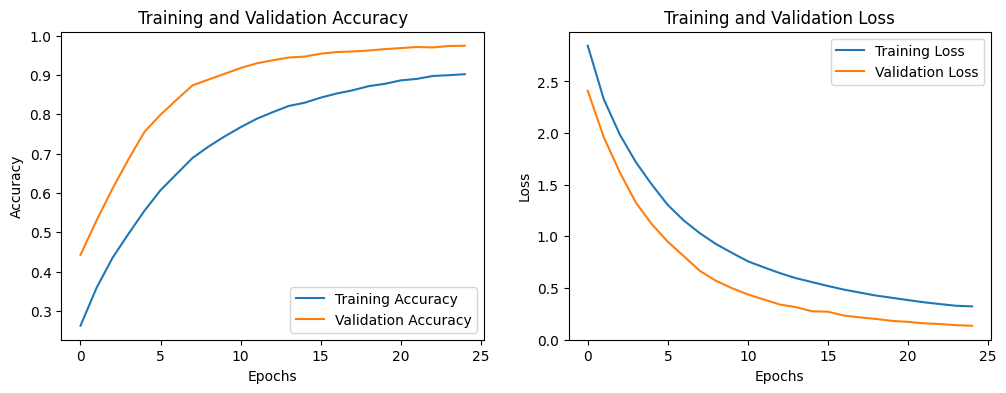

In [59]:
CLASS_NAMES = classes

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)


Testing and Evaluation


In [62]:
# Predict on validation data
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# If y_val contains label indices directly, use it as Y_true
Y_true = y_val  # y_val should already be in integer label form

# Classification Report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=CLASS_NAMES))

# Precision, Recall, F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# # Normalized Confusion Matrix
# conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Normalized Confusion Matrix')
# plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
                                precision    recall  f1-score   support

         Speed limit (20km/h)       1.00      0.95      0.97        38
         Speed limit (30km/h)       0.99      0.96      0.97       496
         Speed limit (50km/h)       0.97      0.95      0.96       450
         Speed limit (60km/h)       0.96      0.95      0.96       280
         Speed limit (70km/h)       0.99      0.99      0.99       418
         Speed limit (80km/h)       0.92      0.95      0.94       364
  End of speed limit (80km/h)       1.00      0.98      0.99        59
        Speed limit (100km/h)       0.97      0.94      0.96       278
        Speed limit (120km/h)       0.93      0.98      0.95       301
                   No passing       0.98      0.98      0.98       268
 No passing veh over 3.5 tons       0.99      0.99      0.99       370
 Right-of-way at intersection       0.95      0.98      0.97       236
           

In [86]:
test_path = '/content/traffic_sign_dataset/traffic_sign_dataset/Test/'
!rm /content/traffic_sign_dataset/traffic_sign_dataset/Test/GT-final_test.csv

rm: cannot remove '/content/traffic_sign_dataset/traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [87]:
# Function to scale and preprocess images
def scaling(test_images, test_path):
    images = []

    for image_name in test_images:
        # Open the image file and resize to 50x50
        img = Image.open(os.path.join(test_path, image_name))
        img = img.resize((50, 50))
        img = np.array(img)

        # Normalize the image pixel values
        images.append(img)

    images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
    return images


In [88]:
# Load the test images and preprocess them
test_path = '/content/traffic_sign_dataset/traffic_sign_dataset/Test/'
test_images = sorted(os.listdir(test_path))
test_images = [img for img in test_images if img.endswith('.ppm')]  # Ensure correct file type
X_test = scaling(test_images, test_path)

In [89]:
test = pd.read_csv('/content/traffic_sign_dataset/traffic_sign_dataset/Test.csv')

y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [90]:
test_images

[]

In [91]:
X_test

array([], dtype=float64)

# GUI Implementation


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


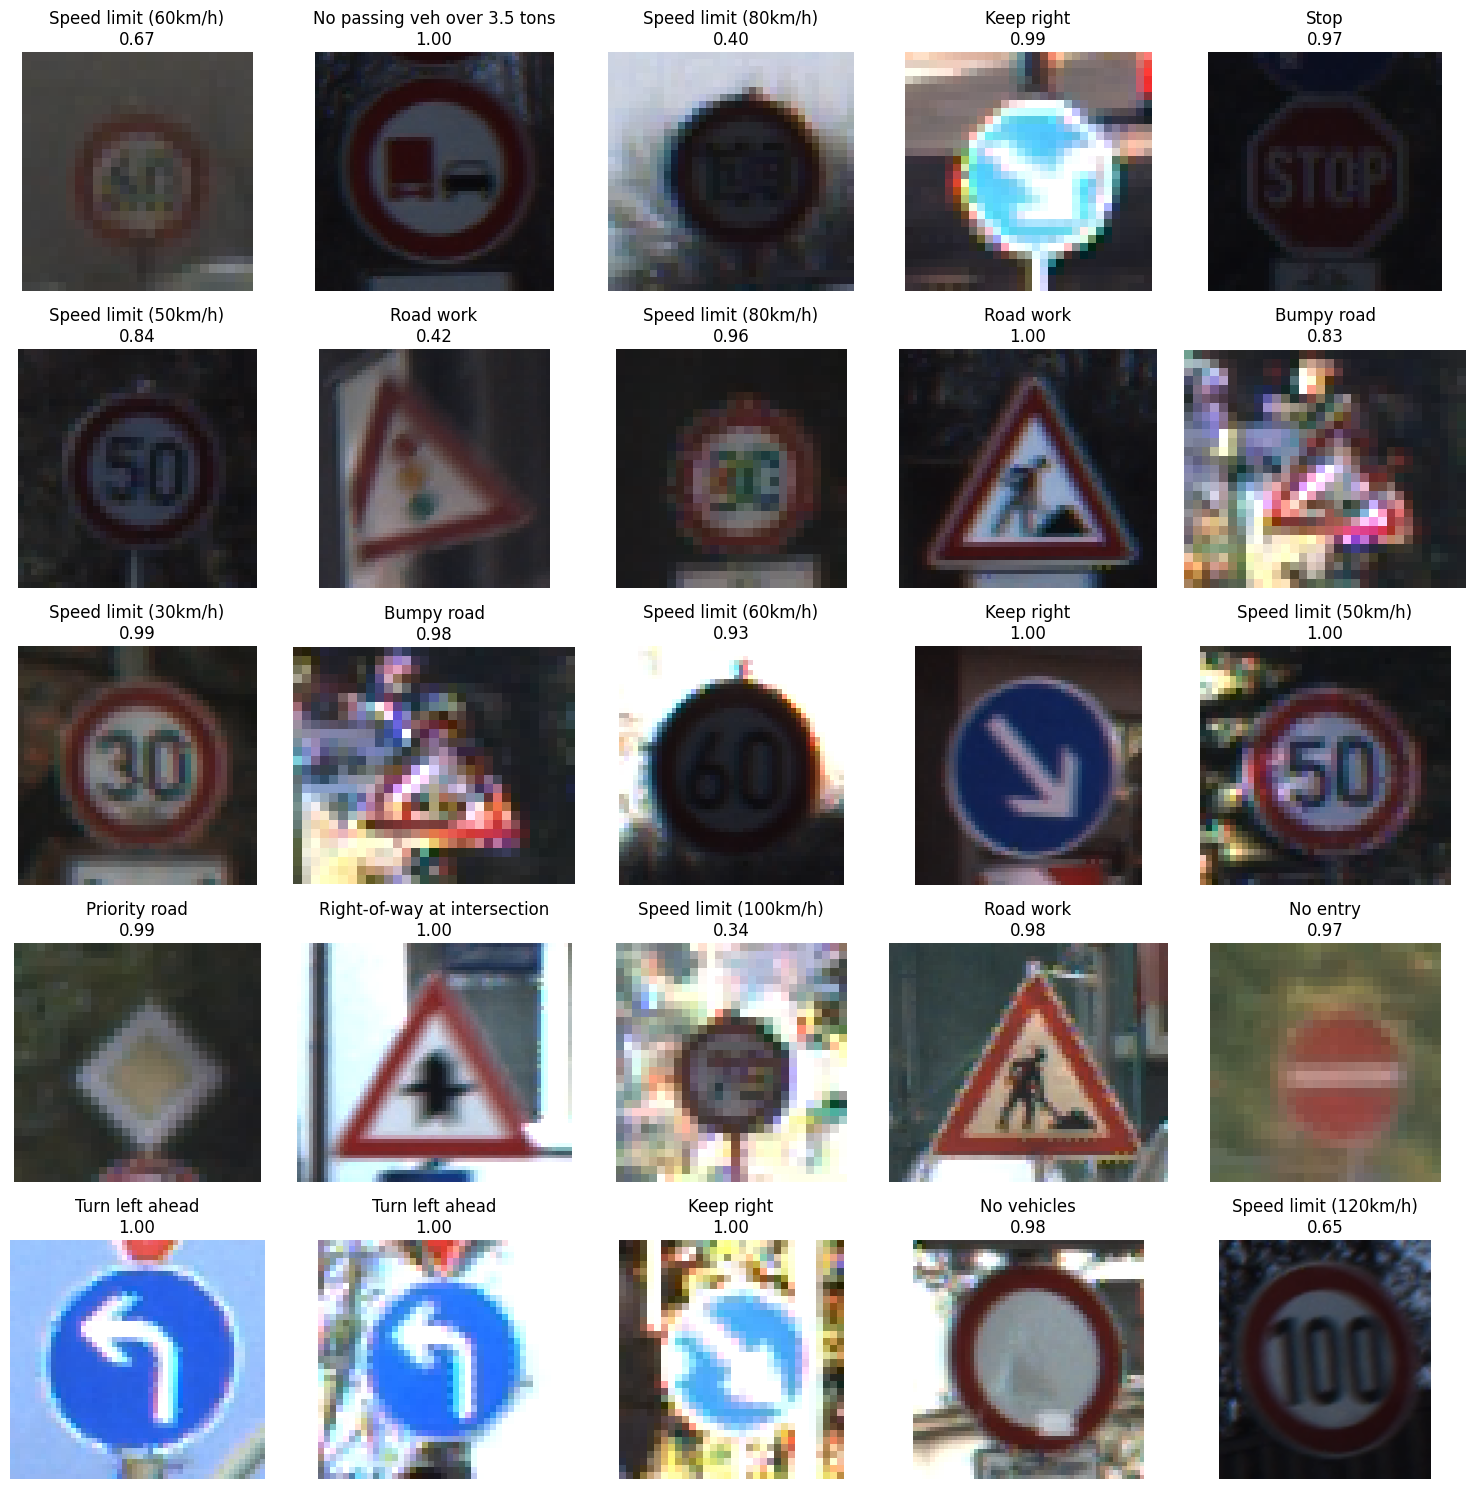

In [102]:
import os
import numpy as np
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage, display_html
from PIL import Image
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Assuming you have the model already loaded
model = model  # Pre-trained model
CLASS_NAMES = classes  # Replace with actual class names

# Function to preprocess and predict images
def scaling(test_images, test_path):
    images = []

    for image_name in test_images:
        # Open the image file and resize to 50x50
        img = Image.open(os.path.join(test_path, image_name))
        img = img.resize((50, 50))
        img = np.array(img)

        # Normalize the image pixel values
        images.append(img)

    images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
    return images

def predict_image_batch(images):
    predictions = model.predict(images)
    return predictions

# Display the prediction results for a batch of images in a 5x5 grid
def display_batch_predictions(test_images, test_path):
    # Preprocess images
    images = scaling(test_images, test_path)

    # Predict and get confidence scores
    predictions = predict_image_batch(images)

    # Create a 5x5 grid to display images and predictions
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    axes = axes.ravel()  # Flatten axes array for easy iteration

    for i, image_name in enumerate(test_images):
        if i >= 25:  # Show only 25 images
            break

        # Get the confidence score and prediction
        confidence_scores = predictions[i]
        pred_index = np.argmax(confidence_scores)
        pred_class = CLASS_NAMES[pred_index]
        pred_confidence = confidence_scores[pred_index]

        # Load the image
        img_path = os.path.join(test_path, image_name)
        img = Image.open(img_path)

        # Plot the image and prediction
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(f"{pred_class}\n{pred_confidence:.2f}")

    # Adjust layout and display the grid
    plt.tight_layout()
    plt.show()

# GUI for displaying the results
upload_button = widgets.Button(description="Process 20 Random Images")
result_label = widgets.Label()

# Function to handle batch processing
def on_batch_process_click(change):
    # Clear previous output (remove old results)
    clear_output(wait=True)

    # Re-display the button and result label
    display(widgets.VBox([upload_button, result_label]))

    # Get list of images in the test directory
    test_images = sorted(os.listdir(test_path))

    # Select 20 random images from the directory
    random_test_images = random.sample(test_images, 25)

    # Call the function to display predictions for the batch
    display_batch_predictions(random_test_images, test_path)

# Attach event handler
upload_button.on_click(on_batch_process_click)

# Display the GUI
display(widgets.VBox([upload_button, result_label]))


In [79]:
classes

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing veh over 3.5 tons',
 'Right-of-way at intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Veh > 3.5 tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve left',
 'Dangerous curve right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End speed + passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End no passing veh > 3.5 tons']

In [80]:
print(x_train.shape)

(31367, 50, 50, 3)


# GUI Implementation

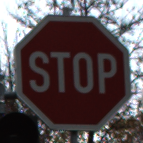

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [103]:
import os
import numpy as np
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import tensorflow as tf

# Assuming you have the model already loaded
model = model  # Pre-trained model
CLASS_NAMES = classes  # Replace with actual class names

# Function to preprocess and predict an uploaded image
def preprocess_image(img):
    img_resized = img.resize((50, 50))
    img_array = np.array(img_resized)

    # Ensure the image has 3 channels (RGB)
    if img_array.shape[-1] != 3:
        img_array = np.stack([img_array] * 3, axis=-1)  # Convert grayscale to RGB

    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 50, 50, 3)
    return img_array

def predict_image(img_array):
    # Predict the image
    prediction = model.predict(img_array)
    return prediction

# Function to handle image upload and prediction
def on_upload_change(change):
    # Clear previous output (remove old image and result)
    clear_output(wait=True)

    # Re-display the upload button and result label
    display(widgets.VBox([upload_button, result_label]))

    for name, file_info in upload_button.value.items():
        # Convert the uploaded file to an image
        image_data = io.BytesIO(file_info['content'])  # Convert binary content to a BytesIO object
        img = Image.open(image_data)  # Open the image with PIL

        # Display the uploaded image
        display(img)

        # Preprocess the image
        img_array = preprocess_image(img)

        # Perform prediction
        predictions = predict_image(img_array)
        confidence_scores = predictions[0]
        pred_index = np.argmax(confidence_scores)
        pred_class = CLASS_NAMES[pred_index]
        pred_confidence = confidence_scores[pred_index]

        # Display the prediction result
        result_label.value = f"Prediction: {pred_class}\nConfidence: {pred_confidence:.2f}"

# Create the file upload widget
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
result_label = widgets.Label()

# Attach event handler for the upload button
upload_button.observe(on_upload_change, names='value')

# Display the widgets
display(widgets.VBox([upload_button, result_label]))
